# CPEN 355 Final Project - NBA MVP Prediction 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

## Loading and Exploring Data

In [2]:
df = pd.read_csv("./data/nba_team_stats_00_to_23.csv")
df.head()

,teamstatspk,Team,games_played,wins,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Boston Celtics,82,64,18,0.780,3966,9887,3601,7396,...,3799,2207,979,557,538,304,1326,1416,930,2023-24
1,1,Denver Nuggets,82,57,25,0.695,3941,9418,3610,7279,...,3643,2415,1036,585,456,394,1489,1467,431,2023-24
2,2,Oklahoma City Thunder,82,57,25,0.695,3961,9847,3653,7324,...,3447,2223,1039,694,538,419,1545,1548,608,2023-24
3,3,Minnesota Timberwolves,82,56,26,0.683,3961,9264,3383,6974,...,3577,2184,1162,647,497,371,1544,1630,529,2023-24
4,4,LA Clippers,82,51,31,0.622,3941,9481,3473,7108,...,3523,2097,1078,640,413,384,1519,1537,269,2023-24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   teamstatspk               716 non-null    int64  
 1   Team                      716 non-null    object 
 2   games_played              716 non-null    int64  
 3   wins                      716 non-null    int64  
 4   losses                    716 non-null    int64  
 5   win_percentage            716 non-null    float64
 6   Min                       716 non-null    int64  
 7   points                    716 non-null    int64  
 8   field_goals_made          716 non-null    int64  
 9   field_goals_attempted     716 non-null    int64  
 10  field_goal_percentage     716 non-null    float64
 11  three_pointers_made       716 non-null    int64  
 12  three_pointers_attempted  716 non-null    int64  
 13  three_point_percentage    716 non-null    float64
 14  free_throw

In [4]:
df.columns

Index(['teamstatspk', 'Team', 'games_played', 'wins', 'losses',
       'win_percentage', 'Min', 'points', 'field_goals_made',
       'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made',
       'three_pointers_attempted', 'three_point_percentage',
       'free_throws_made', 'free_throw_attempted', 'free_throw_percentage',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls',
       'personal_fouls_drawn', 'plus_minus', 'season'],
      dtype='object')

## Splitting the Data

In [5]:
X = df.drop(columns=["wins"])
y = df["wins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,teamstatspk,Team,games_played,losses,win_percentage,Min,points,field_goals_made,field_goals_attempted,field_goal_percentage,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
662,662,New Jersey Nets,82,30,0.634,3966,7889,3042,6816,44.6,...,3554,1990,1189,716,490,439,1734,9,341,2001-02
17,17,Sacramento Kings,82,36,0.561,3971,9558,3553,7455,47.7,...,3607,2324,1078,625,342,370,1632,1504,143,2023-24
266,266,Phoenix Suns,82,59,0.280,3941,8271,3051,7018,43.5,...,3676,1701,1410,632,313,449,1858,1770,-546,2015-16
318,318,New York Knicks,82,45,0.451,3971,8084,3027,6739,44.9,...,3307,1641,1063,631,367,277,1815,1611,-65,2013-14
364,364,Indiana Pacers,66,24,0.636,3198,6449,2354,5375,43.8,...,2896,1228,925,523,357,398,1430,1428,218,2011-12


In [6]:
y_train.head()

662    52
17     46
266    23
318    37
364    42
Name: wins, dtype: int64

## Preprocessing

In [7]:
numeric_features = ['games_played', 'Min', 'points', 'field_goals_made', 'field_goals_attempted', 'field_goal_percentage', 'three_pointers_made', 'three_pointers_attempted', 'three_point_percentage', 'free_throws_made', 'free_throw_attempted', 'free_throw_percentage', 'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'blocks_attempted', 'personal_fouls', 'personal_fouls_drawn', 'plus_minus']
categorical_features = ["Team", "season"]
drop_features = ["teamstatspk", "losses", "win_percentage"]
target_feature = "wins"

In [8]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = make_column_transformer((numeric_transformer, numeric_features), (categorical_transformer, categorical_features), ("drop", drop_features))
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['games_played', 'Min', 'points',
                                  'field_goals_made', 'field_goals_attempted',
                                  'field_goal_percentage',
                                  'three_pointers_made',
                                  'three_pointers_attempted',
                                  'three_point_percentage', 'free_throws_made',
                                  'free_throw_attempted',
                                  'free_throw_percentage', 'offensive_rebounds',
                                  'defensive_rebounds', 'rebounds', 'assists',
                                  'turnovers', 'steals', 'blocks',
                                  'blocks_attempted', 'personal_fouls',
                                  'personal_fouls_drawn', 'plus_minus']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Team', 'season']),
                                ('drop', 'drop',
                                 ['teamstatspk', 'losses', 'win_percentage'])])

## Hyperparameter Optimization

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [10]:
# Dummy pipeline
dummy_pipeline = make_pipeline(preprocessor, DummyRegressor(strategy="mean"))

# LinearRegression pipeline
lr_pipeline = make_pipeline(preprocessor, LinearRegression())

# SVR pipeline
svr_pipeline = make_pipeline(preprocessor, SVR(kernel="linear"))

# RandomForest pipeline
rf_pipeline = make_pipeline(preprocessor, RandomForestRegressor(random_state=0))

In [11]:
# Parameter grid for RandomForestRegressor
rf_param_grid = {
  'randomforestregressor__n_estimators': [100, 200, 500],
  'randomforestregressor__max_depth': [None, 5, 10, 20],
}

# Parameter grid for SVR
svr_param_grid = {
  'svr__C': np.logspace(-3, 3, num=7, base=10),
}

In [12]:
def get_gridcv_model(model, param_grid, X_train, y_train):
  grid = GridSearchCV(model, param_grid, cv=3)
  grid.fit(X_train, y_train)

  print(f"Best accuracy: {grid.best_score_}")
  print(f"Best parameters: {grid.best_params_}")
  return grid

In [13]:
svr_grid = get_gridcv_model(svr_pipeline, svr_param_grid, X_train, y_train)
best_svr_pipe = svr_grid.best_estimator_

Best accuracy: 0.9311843279373816
Best parameters: {'svr__C': 1.0}


In [14]:
rf_grid = get_gridcv_model(rf_pipeline, rf_param_grid, X_train, y_train)
best_rf_pipe = rf_grid.best_estimator_

Best accuracy: 0.9294080779660655
Best parameters: {'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 500}


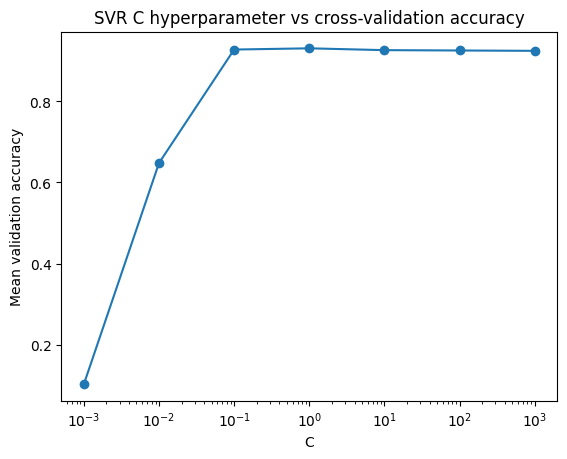

In [15]:
svr_grid_cv_results = pd.DataFrame(svr_grid.cv_results_)

Cs = svr_grid_cv_results["param_svr__C"]
Cs_acc = svr_grid_cv_results["mean_test_score"]

plt.scatter(Cs, Cs_acc)
plt.xscale('log')

plt.xlabel('C')
plt.ylabel('Mean validation accuracy')
plt.plot(Cs, Cs_acc)
plt.title('SVR C hyperparameter vs cross-validation accuracy')
plt.show()

In [16]:
svr_grid_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023864,0.002106,0.011018,0.001614,0.001,{'svr__C': 0.001},0.098319,0.112293,0.094868,0.101826,0.007534,7
1,0.022198,0.003698,0.009682,0.001685,0.01,{'svr__C': 0.01},0.642030,0.664372,0.637409,0.647937,0.011773,6
2,0.027699,0.003836,0.012680,0.001263,0.1,{'svr__C': 0.1},0.917105,0.937397,0.929948,0.928150,0.008381,2
3,0.041251,0.001243,0.009447,0.001539,1.0,{'svr__C': 1.0},0.922680,0.935610,0.935263,0.931184,0.006015,1
4,0.236916,0.029654,0.008198,0.000863,10.0,{'svr__C': 10.0},0.917806,0.930599,0.931625,0.926677,0.006286,3
5,2.730074,1.268255,0.007333,0.000471,100.0,{'svr__C': 100.0},0.918746,0.929643,0.929135,0.925841,0.005022,4
6,23.378570,4.199280,0.006778,0.001110,1000.0,{'svr__C': 1000.0},0.918780,0.929252,0.926854,0.924962,0.004480,5


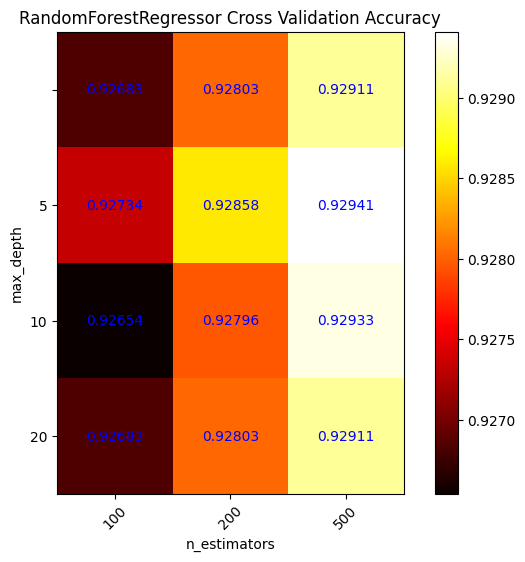

In [17]:
rf_grid_cv_results = pd.DataFrame(rf_grid.cv_results_)

rf_param_grid = {
  'randomforestregressor__n_estimators': [100, 200, 500],
  'randomforestregressor__max_depth': [None, 5, 10, 20],
}

scores = rf_grid_cv_results['mean_test_score']
param1_values = rf_param_grid['randomforestregressor__n_estimators'] 
param2_values = rf_param_grid['randomforestregressor__max_depth']

# Reshape the score results to fit a matrix form (assuming param1 is x-axis, param2 is y-axis)
scores_matrix = scores.values.reshape(len(param2_values), len(param1_values))

# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(param1_values)), param1_values, rotation=45)
plt.yticks(np.arange(len(param2_values)), param2_values)
plt.title('RandomForestRegressor Cross Validation Accuracy')

# Add the numerical values on the heatmap
for i in range(len(param2_values)):
  for j in range(len(param1_values)):
    plt.text(j, i, round(scores_matrix[i, j], 5), ha='center', va='center', color='blue')

plt.show()

In [18]:
rf_grid_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.819299,0.209589,0.010944,0.000733,None,100,"{'randomforestregressor__max_depth': None, 'ra...",0.926890,0.922135,0.931474,0.926833,0.003813,10
1,1.584432,0.467210,0.017351,0.000523,None,200,"{'randomforestregressor__max_depth': None, 'ra...",0.927771,0.923952,0.932373,0.928032,0.003443,6
2,3.947530,1.161682,0.033407,0.003130,None,500,"{'randomforestregressor__max_depth': None, 'ra...",0.928369,0.924850,0.934126,0.929115,0.003824,3
3,0.452444,0.074072,0.011132,0.001462,5,100,"{'randomforestregressor__max_depth': 5, 'rando...",0.929381,0.921272,0.931374,0.927343,0.004369,9
4,0.945898,0.088457,0.015630,0.001247,5,200,"{'randomforestregressor__max_depth': 5, 'rando...",0.929936,0.922669,0.933142,0.928582,0.004381,5
5,2.251208,0.305044,0.029956,0.000983,5,500,"{'randomforestregressor__max_depth': 5, 'rando...",0.930342,0.923220,0.934662,0.929408,0.004718,1
6,0.763324,0.205896,0.009766,0.000911,10,100,"{'randomforestregressor__max_depth': 10, 'rand...",0.927495,0.921441,0.930685,0.926540,0.003834,12
7,1.533672,0.465392,0.017201,0.001448,10,200,"{'randomforestregressor__max_depth': 10, 'rand...",0.928105,0.923303,0.932460,0.927956,0.003740,8
8,3.812251,1.104560,0.032633,0.001864,10,500,"{'randomforestregressor__max_depth': 10, 'rand...",0.928988,0.924607,0.934394,0.929330,0.004003,2
9,0.800843,0.252482,0.010630,0.001371,20,100,"{'randomforestregressor__max_depth': 20, 'rand...",0.926890,0.922135,0.931474,0.926833,0.003813,10


## Model Training

In [19]:
from sklearn.metrics import root_mean_squared_error, r2_score

In [20]:
rmse_scores = []
r2_scores = []

In [21]:
def model_training_and_evaluation(pipe, X_train, y_train, X_test, y_test):
  pipe.fit(X_train, y_train)
  
  y_pred = pipe.predict(X_test)
  rmse = root_mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  rmse_scores.append(rmse)
  r2_scores.append(r2)
  print("RMSE: ", rmse)
  print("R2: ", r2)
  return pipe, rmse, r2

In [22]:
models = [("DummyRegressor", dummy_pipeline), ("LinearRegressor", lr_pipeline), ("SVR", best_svr_pipe), ("RandomForestRegressor", best_rf_pipe)]

for name, model in models:
  print(name)
  model_training_and_evaluation(model, X_train, y_train, X_test, y_test)

DummyRegressor
RMSE:  12.037692439969176
R2:  -0.050291877671502005
LinearRegressor
RMSE:  3.2470727770708265
R2:  0.9235799062446571
SVR
RMSE:  3.293118257457155
R2:  0.9213971714922672
RandomForestRegressor
RMSE:  3.648253984244698
R2:  0.9035296949617656


## Model evaluation

In [23]:
df_scores = pd.DataFrame({"RMSE": rmse_scores, "R2": r2_scores}, index=[name for name, _ in models])
df_scores

,RMSE,R2
DummyRegressor,12.037692,-0.050292
LinearRegressor,3.247073,0.923580
SVR,3.293118,0.921397
RandomForestRegressor,3.648254,0.903530


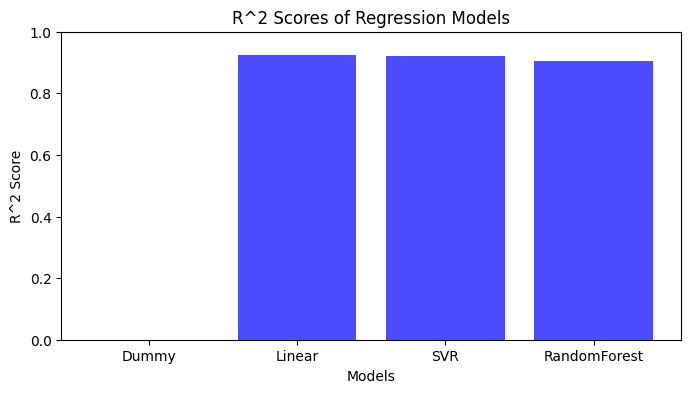

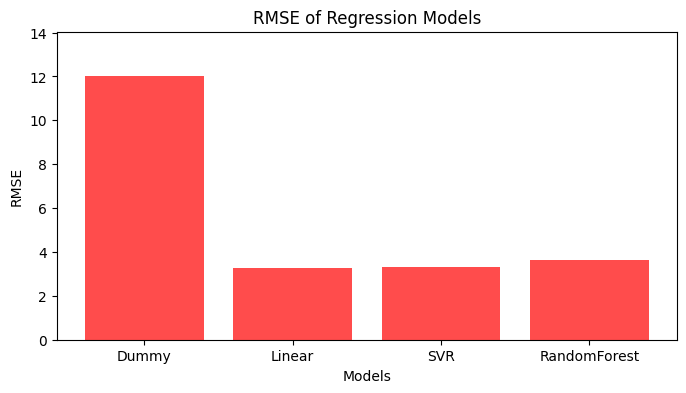

In [24]:
# Model names
models_names = ['Dummy', 'Linear', 'SVR', 'RandomForest']

# Plot R^2 Scores
plt.figure(figsize=(8, 4))
plt.bar(models_names, r2_scores, color='blue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('R^2 Scores of Regression Models')
plt.ylim([0, 1])  # Adjust as needed for your scores
plt.show()

# Plot MSE Scores
plt.figure(figsize=(8, 4))
plt.bar(models_names, rmse_scores, color='red', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE of Regression Models')
plt.ylim([0, max(rmse_scores) + 2])  # Adjust the limit to see all bars clearly
plt.show()



## Feature importances

In [25]:
ohe_features = best_svr_pipe.named_steps["columntransformer"].named_transformers_["onehotencoder"].get_feature_names_out(categorical_features).tolist()

feature_names = (numeric_features + ohe_features)
feature_names[:10]

['games_played',
 'Min',
 'points',
 'field_goals_made',
 'field_goals_attempted',
 'field_goal_percentage',
 'three_pointers_made',
 'three_pointers_attempted',
 'three_point_percentage',
 'free_throws_made']

In [26]:
lr_coefs = pd.DataFrame(data=lr_pipeline.named_steps["linearregression"].coef_, index=feature_names, columns=["Coefficient"])
lr_coefs_sorted = lr_coefs.iloc[(lr_coefs['Coefficient'].abs()).argsort()[::-1]]
lr_coefs_sorted.head(10)

,Coefficient
plus_minus,10.408640
three_pointers_made,-6.505327
three_pointers_attempted,6.302522
field_goals_attempted,-4.852664
free_throw_attempted,-3.998600
free_throws_made,3.824401
Team_Vancouver Grizzlies,-3.239691
field_goals_made,2.988154
season_2004-05,-2.593156
Min,2.417796


In [27]:
svr_coefs = pd.DataFrame(data=best_svr_pipe.named_steps["svr"].coef_.toarray()[0], index=feature_names, columns=["Coefficient"])
svr_coefs_sorted = svr_coefs.iloc[(svr_coefs['Coefficient'].abs()).argsort()[::-1]]
svr_coefs_sorted.head(10)

,Coefficient
plus_minus,9.790028
Min,2.727297
Team_Minnesota Timberwolves,-1.825392
Team_Denver Nuggets,1.561245
field_goals_attempted,-1.509115
Team_Portland Trail Blazers,1.378767
Team_Cleveland Cavaliers,1.359379
Team_New Orleans Pelicans,-1.346249
season_2006-07,1.216050
turnovers,-1.212693


In [28]:
data = {
  "Importance": best_rf_pipe.named_steps["randomforestregressor"].feature_importances_,
}
rf_imp_df = pd.DataFrame(
  data=data,
  index=feature_names,
).sort_values(by="Importance", ascending=False)

rf_imp_df.head(10)

,Importance
plus_minus,0.953433
Min,0.009407
rebounds,0.004078
personal_fouls,0.003557
defensive_rebounds,0.003472
field_goals_attempted,0.003447
games_played,0.003338
turnovers,0.002849
field_goals_made,0.001824
offensive_rebounds,0.001700
